### 1. Load History OHCLV 

create a new terminal and 

Download-data: 
`
freqtrade download-data --config user_data/config.json --timeframe 15m --timerange 20240101-20250101
`

File-like:
`
BTC_USDT-15m.feather
`


In [1]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')

file_path = '../../../freqtrade/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
print(coins)

['BTC/USDT:USDT', 'ETH/USDT:USDT', 'BNB/USDT:USDT', 'DOGE/USDT:USDT', 'SOL/USDT:USDT', 'XRP/USDT:USDT', '1000PEPE/USDT:USDT', '1000SHIB/USDT:USDT', 'AAVE/USDT:USDT', 'ADA/USDT:USDT', 'ARB/USDT:USDT', 'AVAX/USDT:USDT', 'ENA/USDT:USDT', 'ETC/USDT:USDT', 'FIL/USDT:USDT', 'LINK/USDT:USDT', 'LTC/USDT:USDT', 'NEAR/USDT:USDT', 'SEI/USDT:USDT', 'SUI/USDT:USDT', 'WLD/USDT:USDT', 'XLM/USDT:USDT', 'TRUMP/USDT:USDT', '1000FLOKI/USDT:USDT', '1000SATS/USDT:USDT', 'ACT/USDT:USDT', 'AERGO/USDT:USDT', 'APT/USDT:USDT', 'ATH/USDT:USDT', 'BABY/USDT:USDT', 'BANANAS31/USDT:USDT', 'BANANA/USDT:USDT', 'BANK/USDT:USDT', 'BCH/USDT:USDT', 'BROCCOLI714/USDT:USDT', 'BROCCOLIF3B/USDT:USDT', 'BR/USDT:USDT', 'BTCDOM/USDT:USDT', 'DEEP/USDT:USDT', 'DOT/USDT:USDT', 'EDU/USDT:USDT', 'EPT/USDT:USDT', 'FHE/USDT:USDT', 'FIS/USDT:USDT', 'FORM/USDT:USDT', 'FORTH/USDT:USDT', 'FUN/USDT:USDT', 'GRASS/USDT:USDT', 'GUN/USDT:USDT', 'HBAR/USDT:USDT', 'HIPPO/USDT:USDT', 'HMSTR/USDT:USDT', 'HYPER/USDT:USDT', 'ICP/USDT:USDT', 'INIT/USD

### 2. Pair Filter

In [2]:
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]

top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

import random
random200 = random.sample(coins, 200)

target_coins = top200

### 3. Load History OHLCV 

In [3]:
def extract_coin_data(directory):
    coin_list = {}
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                if len(df) > 0 :
                    coin_list[coin_symbol] = df
                    symbols.append(coin_symbol)
    
    return coin_list,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)
print(len(coins))

139


### 3. History Data Transform

In [4]:
import pandas as pd
close_dfs = []
open_dfs = []
high_dfs = []
low_dfs = []
volume_dfs = []


for symbol, df in coins.items():
    
    temp_df = df[['date', 'close']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    close_dfs.append(temp_df)



    temp_df = df[['date', 'open']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    open_dfs.append(temp_df)


    temp_df = df[['date', 'high']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    high_dfs.append(temp_df)
    

    temp_df = df[['date', 'low']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    low_dfs.append(temp_df)

    temp_df = df[['date', 'volume']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    volume_dfs.append(temp_df)



close = pd.concat(close_dfs, axis=1)
open = pd.concat(open_dfs, axis=1)
high = pd.concat(high_dfs, axis=1)
low = pd.concat(low_dfs, axis=1)
volume = pd.concat(volume_dfs, axis=1)
amount = close.mul(volume, fill_value=1)

### 4. OHLCV Filter

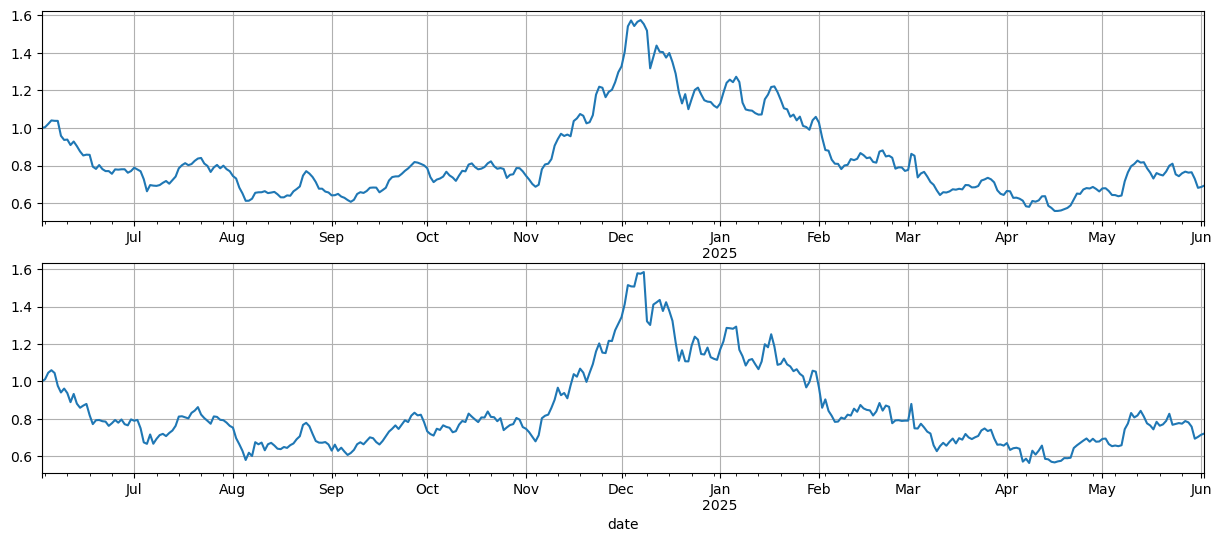

In [5]:
start_time = '2024-06-01'
end_time = '2025-06-30'
close_filter = close[(close.index > start_time) & (close.index < end_time)]
open_filter = open[(open.index > start_time) & (open.index < end_time)]
high_filter = high[(high.index > start_time) & (high.index < end_time)]
low_filter = low[(low.index > start_time) & (low.index < end_time)]
volume_filter = volume[(volume.index > start_time) & (volume.index < end_time)]
amount_filter = amount[(amount.index > start_time) & (amount.index < end_time)]

import matplotlib.pyplot as plt
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
high_norm = high_filter/high_filter.bfill().iloc[0] 
close_norm = close_filter/close_filter.bfill().iloc[0] 
high_norm.mean(axis=1).plot(ax=ax1, figsize=(15,6),grid=True)
close_norm.mean(axis=1).plot(ax=ax2, figsize=(15,6),grid=True);

### 5. Define Factor


this step is the most important. 

define ur factor



In [6]:
# Factor in WorldQuant 101
import utils.Alpha101 as alpha101

df_data = {
    'open' : open_filter,
    'close' : close_filter,
    'high' : high_filter,
    'low' : low_filter,
    'volume' : volume_filter, 
}

alpha_all_in_one = alpha101.Alphas101(df_data)

Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D
Ann. alpha                                      0.056
beta                                            0.024
Mean Period Wise Return Top Quantile (bps)     -3.720
Mean Period Wise Return Bottom Quantile (bps) -13.807
Mean Period Wise Spread (bps)                  10.087

<Figure size 640x480 with 0 Axes>

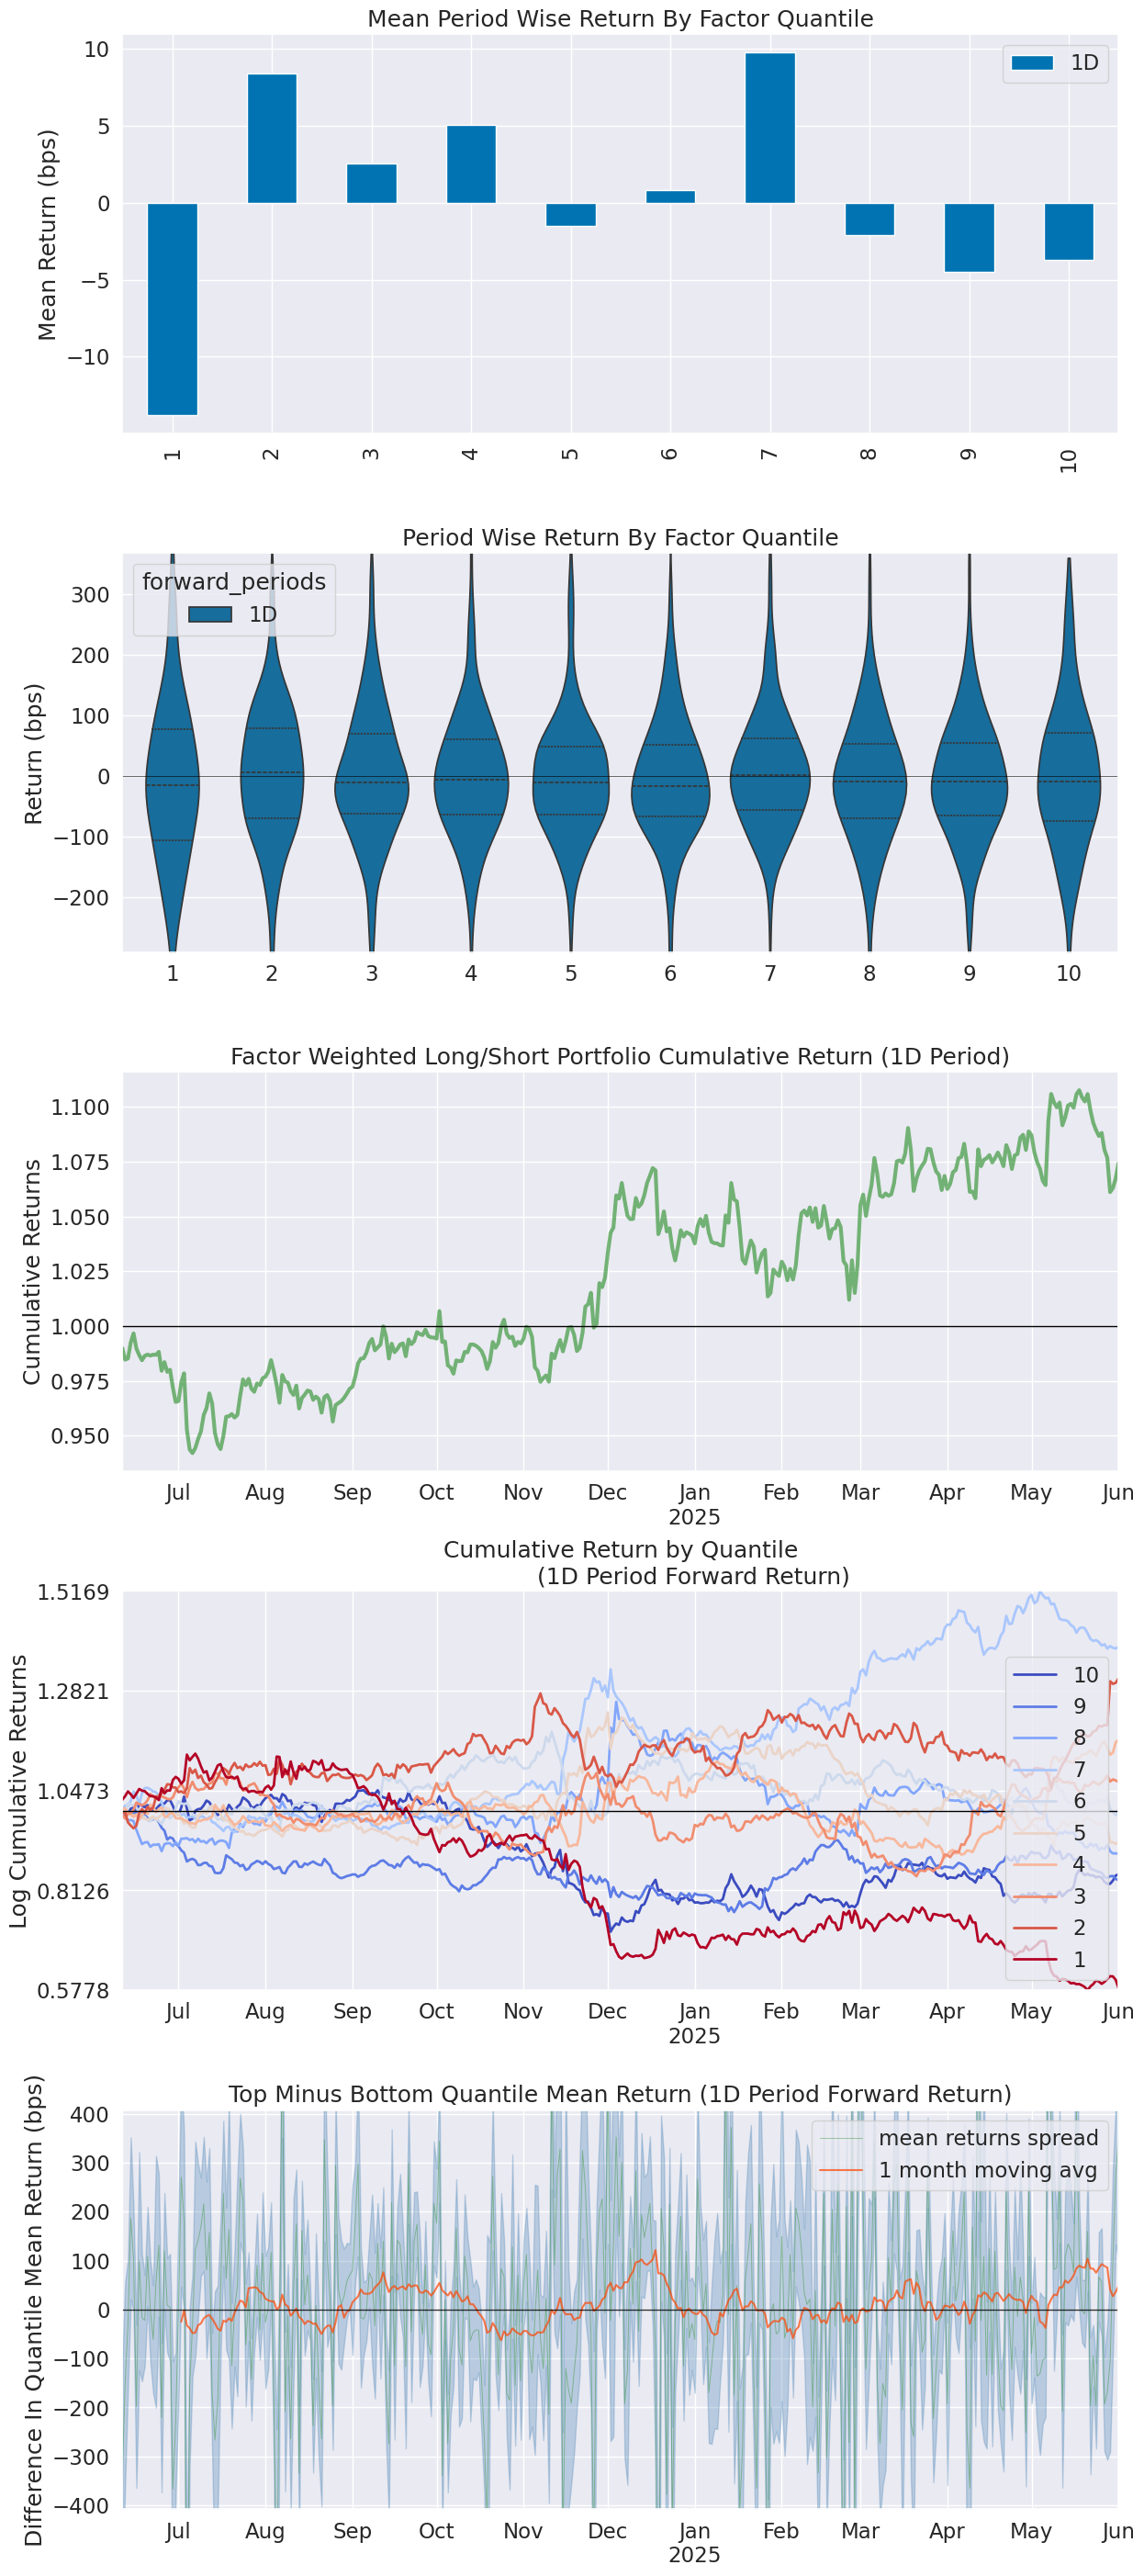

In [7]:
alpha_name = 'alpha040'
method = getattr(alpha_all_in_one, alpha_name)
single_alpha = method() 
alpha040 = single_alpha
factor = single_alpha.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值
price = close_filter

import alphalens
import alphalens.utils as utils
import alphalens.tears as tears
factor_data = utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,),  
    quantiles = 10
)
# periods means when we adjust position , 1 for 1days 
# quantiles means we split all coins into x basket



RT = tears.create_returns_tear_sheet(
    factor_data
)
RT

Dropped 13.7% entries from factor data: 12.9% in forward returns computation and 0.8% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D
Ann. alpha                                    -0.033
beta                                           0.001
Mean Period Wise Return Top Quantile (bps)    -0.528
Mean Period Wise Return Bottom Quantile (bps) -0.385
Mean Period Wise Spread (bps)                 -0.143

<Figure size 640x480 with 0 Axes>

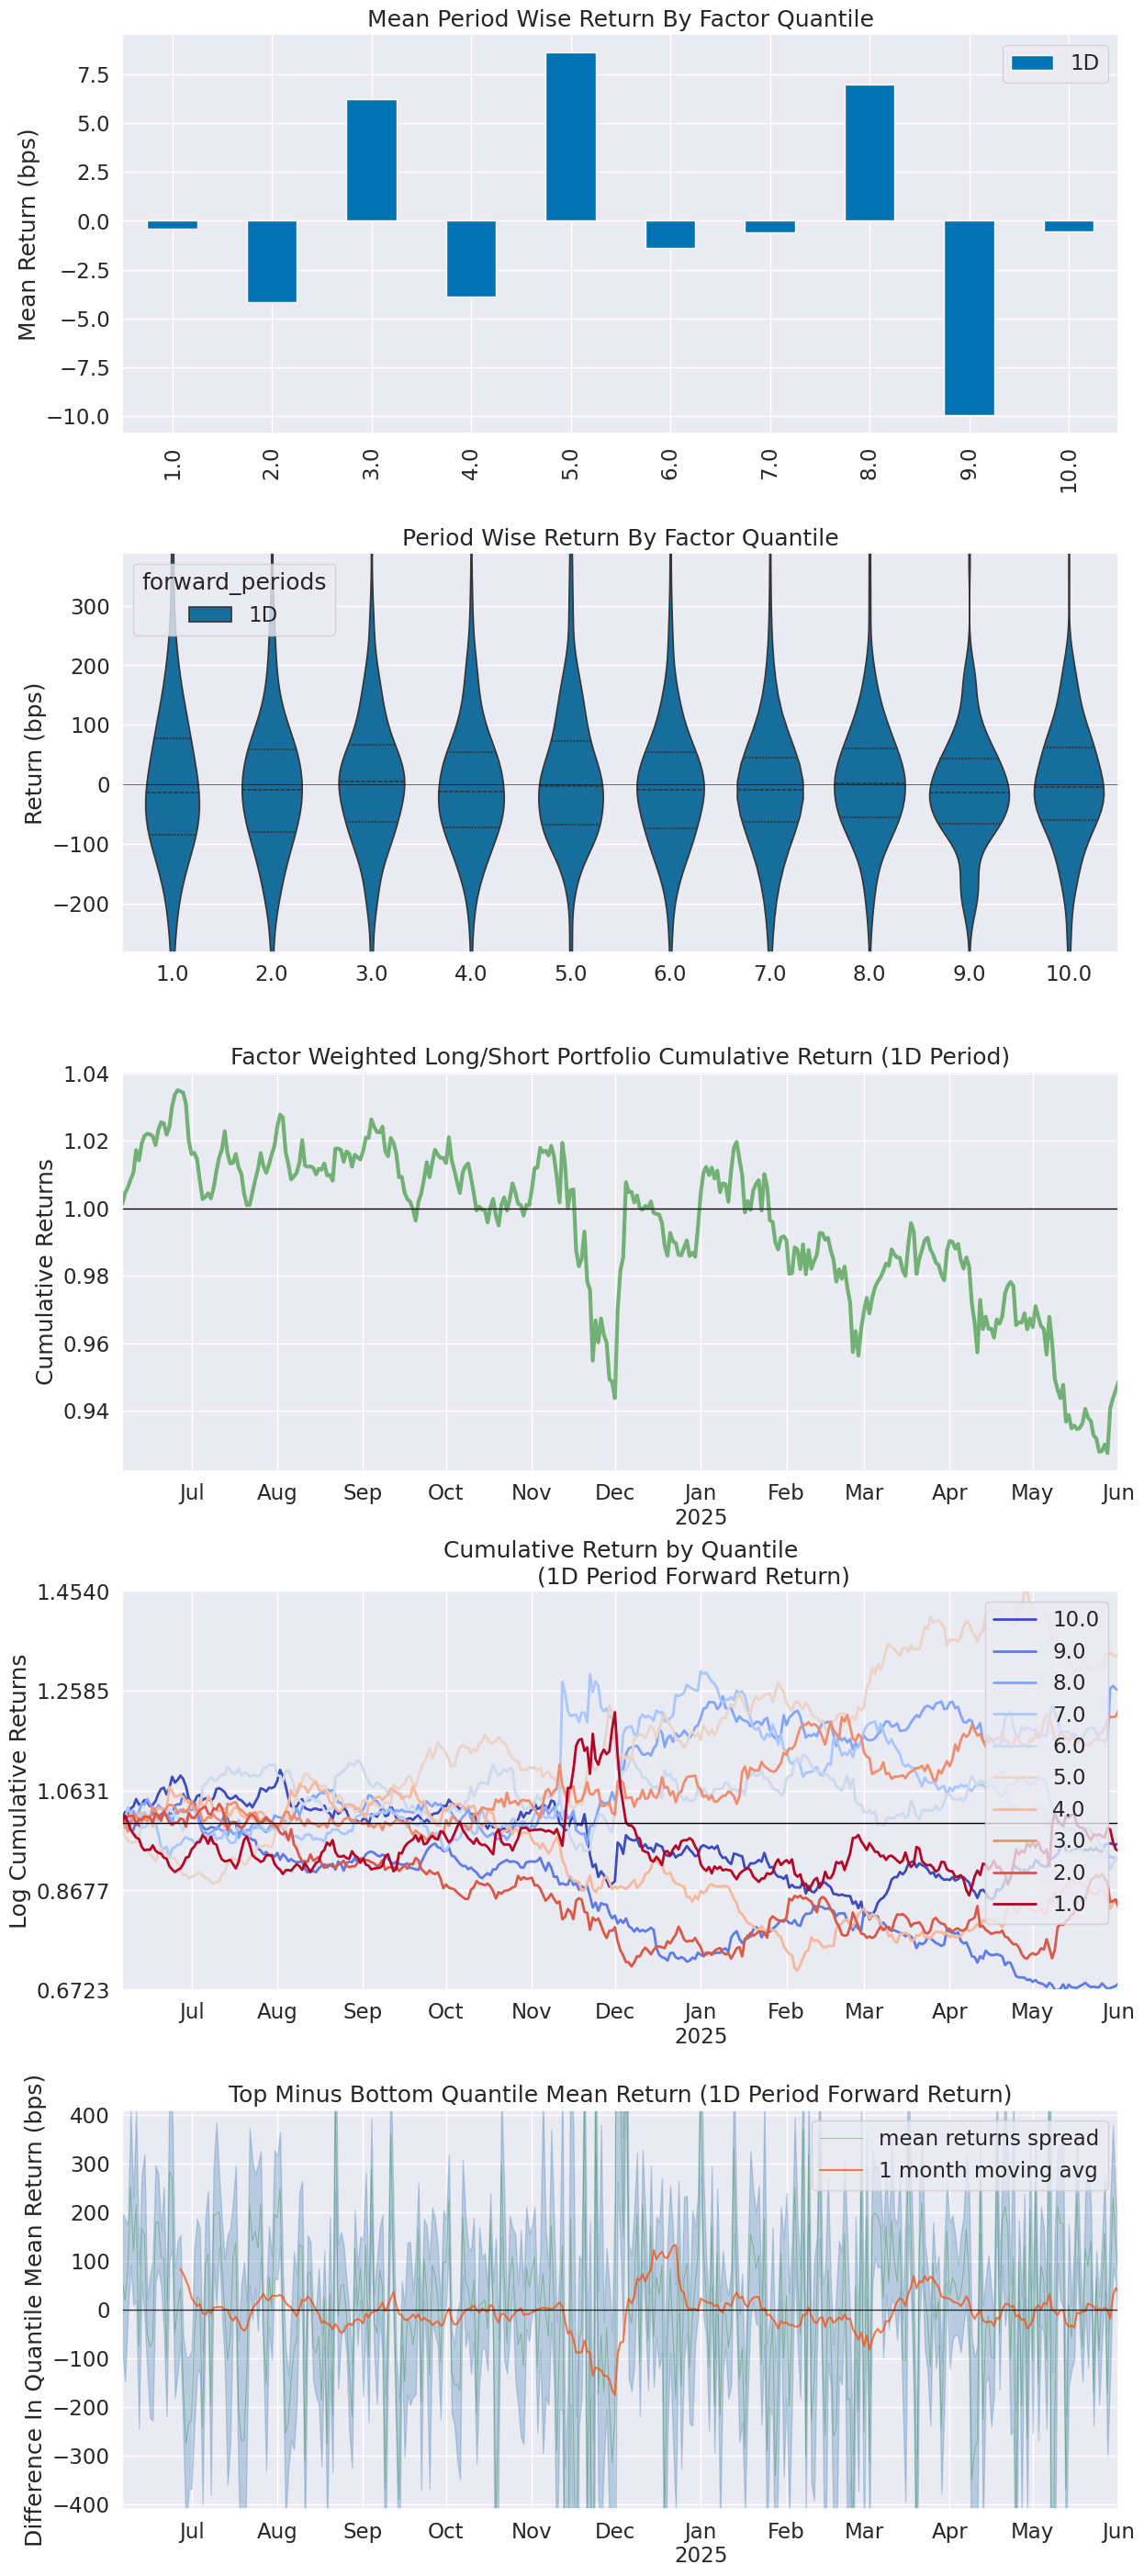

In [8]:
alpha_name = 'alpha044'
method = getattr(alpha_all_in_one, alpha_name)
single_alpha = method() 
alpha044 = single_alpha
factor = single_alpha.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值
price = close_filter


import alphalens
import alphalens.utils as utils
import alphalens.tears as tears
factor_data = utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,),  
    quantiles = 10
)
# periods means when we adjust position , 1 for 1days 
# quantiles means we split all coins into x basket



RT = tears.create_returns_tear_sheet(
    factor_data
)
RT

In [9]:
single_alpha

BTC/USDT:USDT  ETH/USDT:USDT  BNB/USDT:USDT  \
date                                                                     
2024-06-02 00:00:00+00:00      -0.000000      -0.000000      -0.000000   
2024-06-03 00:00:00+00:00      -0.000000      -0.000000      -0.000000   
2024-06-04 00:00:00+00:00      -0.000000      -0.000000      -0.000000   
2024-06-05 00:00:00+00:00      -0.000000      -0.000000      -0.000000   
2024-06-06 00:00:00+00:00      -0.465542      -0.632418      -0.606100   
...                                  ...            ...            ...   
2025-05-29 00:00:00+00:00      -0.267353      -0.932718      -0.958732   
2025-05-30 00:00:00+00:00      -0.121850      -0.840639      -0.986819   
2025-05-31 00:00:00+00:00      -0.591070      -0.940852      -0.995735   
2025-06-01 00:00:00+00:00      -0.160789      -0.952328      -0.995284   
2025-06-02 00:00:00+00:00      -0.833841      -0.939264      -0.885249   

                           DOGE/USDT:USDT  SOL/USDT:USDT  XRP/USDT:USDT  \
date                                                                      
2024-06-02 00:00:00+00:00       -0.000000      -0.000000      -0.000000   
2024-06-03 00:00:00+00:00       -0.000000      -0.000000      -0.000000   
2024-06-04 00:00:00+00:00       -0.000000      -0.000000      -0.000000   
2024-06-05 00:00:00+00:00       -0.000000      -0.000000      -0.000000   
2024-06-06 00:00:00+00:00       -0.382353       0.078100       0.811792   
...                                   ...            ...            ...   
2025-05-29 00:00:00+00:00       -0.225982       0.133669       0.669132   
2025-05-30 00:00:00+00:00        0.308867      -0.931285       0.165382   
2025-05-31 00:00:00+00:00       -0.000000      -0.804028      -0.845461   
2025-06-01 00:00:00+00:00       -0.597391      -0.094407      -0.882538   
2025-06-02 00:00:00+00:00       -0.418831       0.234590      -0.863740   

                           AAVE/USDT:USDT  ADA/USDT:USDT  ARB/USDT:USDT  \
date                                                                      
2024-06-02 00:00:00+00:00       -0.000000      -0.000000      -0.000000   
2024-06-03 00:00:00+00:00       -0.000000      -0.000000      -0.000000   
2024-06-04 00:00:00+00:00       -0.000000      -0.000000      -0.000000   
2024-06-05 00:00:00+00:00       -0.000000      -0.000000      -0.000000   
2024-06-06 00:00:00+00:00        0.347836       0.443529       0.366238   
...                                   ...            ...            ...   
2025-05-29 00:00:00+00:00        0.406545       0.006681      -0.919652   
2025-05-30 00:00:00+00:00       -0.738022      -0.373652      -0.725072   
2025-05-31 00:00:00+00:00       -0.751466       0.288560      -0.622614   
2025-06-01 00:00:00+00:00        0.059732       0.365114      -0.895220   
2025-06-02 00:00:00+00:00        0.075620       0.238426      -0.934342   

                           AVAX/USDT:USDT  ...  AERO/USDT:USDT  AKT/USDT:USDT  \
date                                       ...                                  
2024-06-02 00:00:00+00:00       -0.000000  ...       -0.000000      -0.000000   
2024-06-03 00:00:00+00:00       -0.000000  ...       -0.000000      -0.000000   
2024-06-04 00:00:00+00:00       -0.000000  ...       -0.000000      -0.000000   
2024-06-05 00:00:00+00:00       -0.000000  ...       -0.000000      -0.000000   
2024-06-06 00:00:00+00:00        0.615203  ...       -0.000000      -0.000000   
...                                   ...  ...             ...            ...   
2025-05-29 00:00:00+00:00       -0.691797  ...        0.380573      -0.012579   
2025-05-30 00:00:00+00:00       -0.472481  ...       -0.567832       0.379316   
2025-05-31 00:00:00+00:00       -0.659606  ...       -0.644347      -0.631040   
2025-06-01 00:00:00+00:00       -0.798568  ...       -0.009477      -0.880205   
2025-06-02 00:00:00+00:00       -0.955918  ...       -0.178136      -0.770983   

                           ASTR/USDT:USDT  BRETT/USDT:USDT

Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D
Ann. alpha                                      0.140
beta                                            0.010
Mean Period Wise Return Top Quantile (bps)      7.360
Mean Period Wise Return Bottom Quantile (bps)  -9.892
Mean Period Wise Spread (bps)                  17.252

<Figure size 640x480 with 0 Axes>

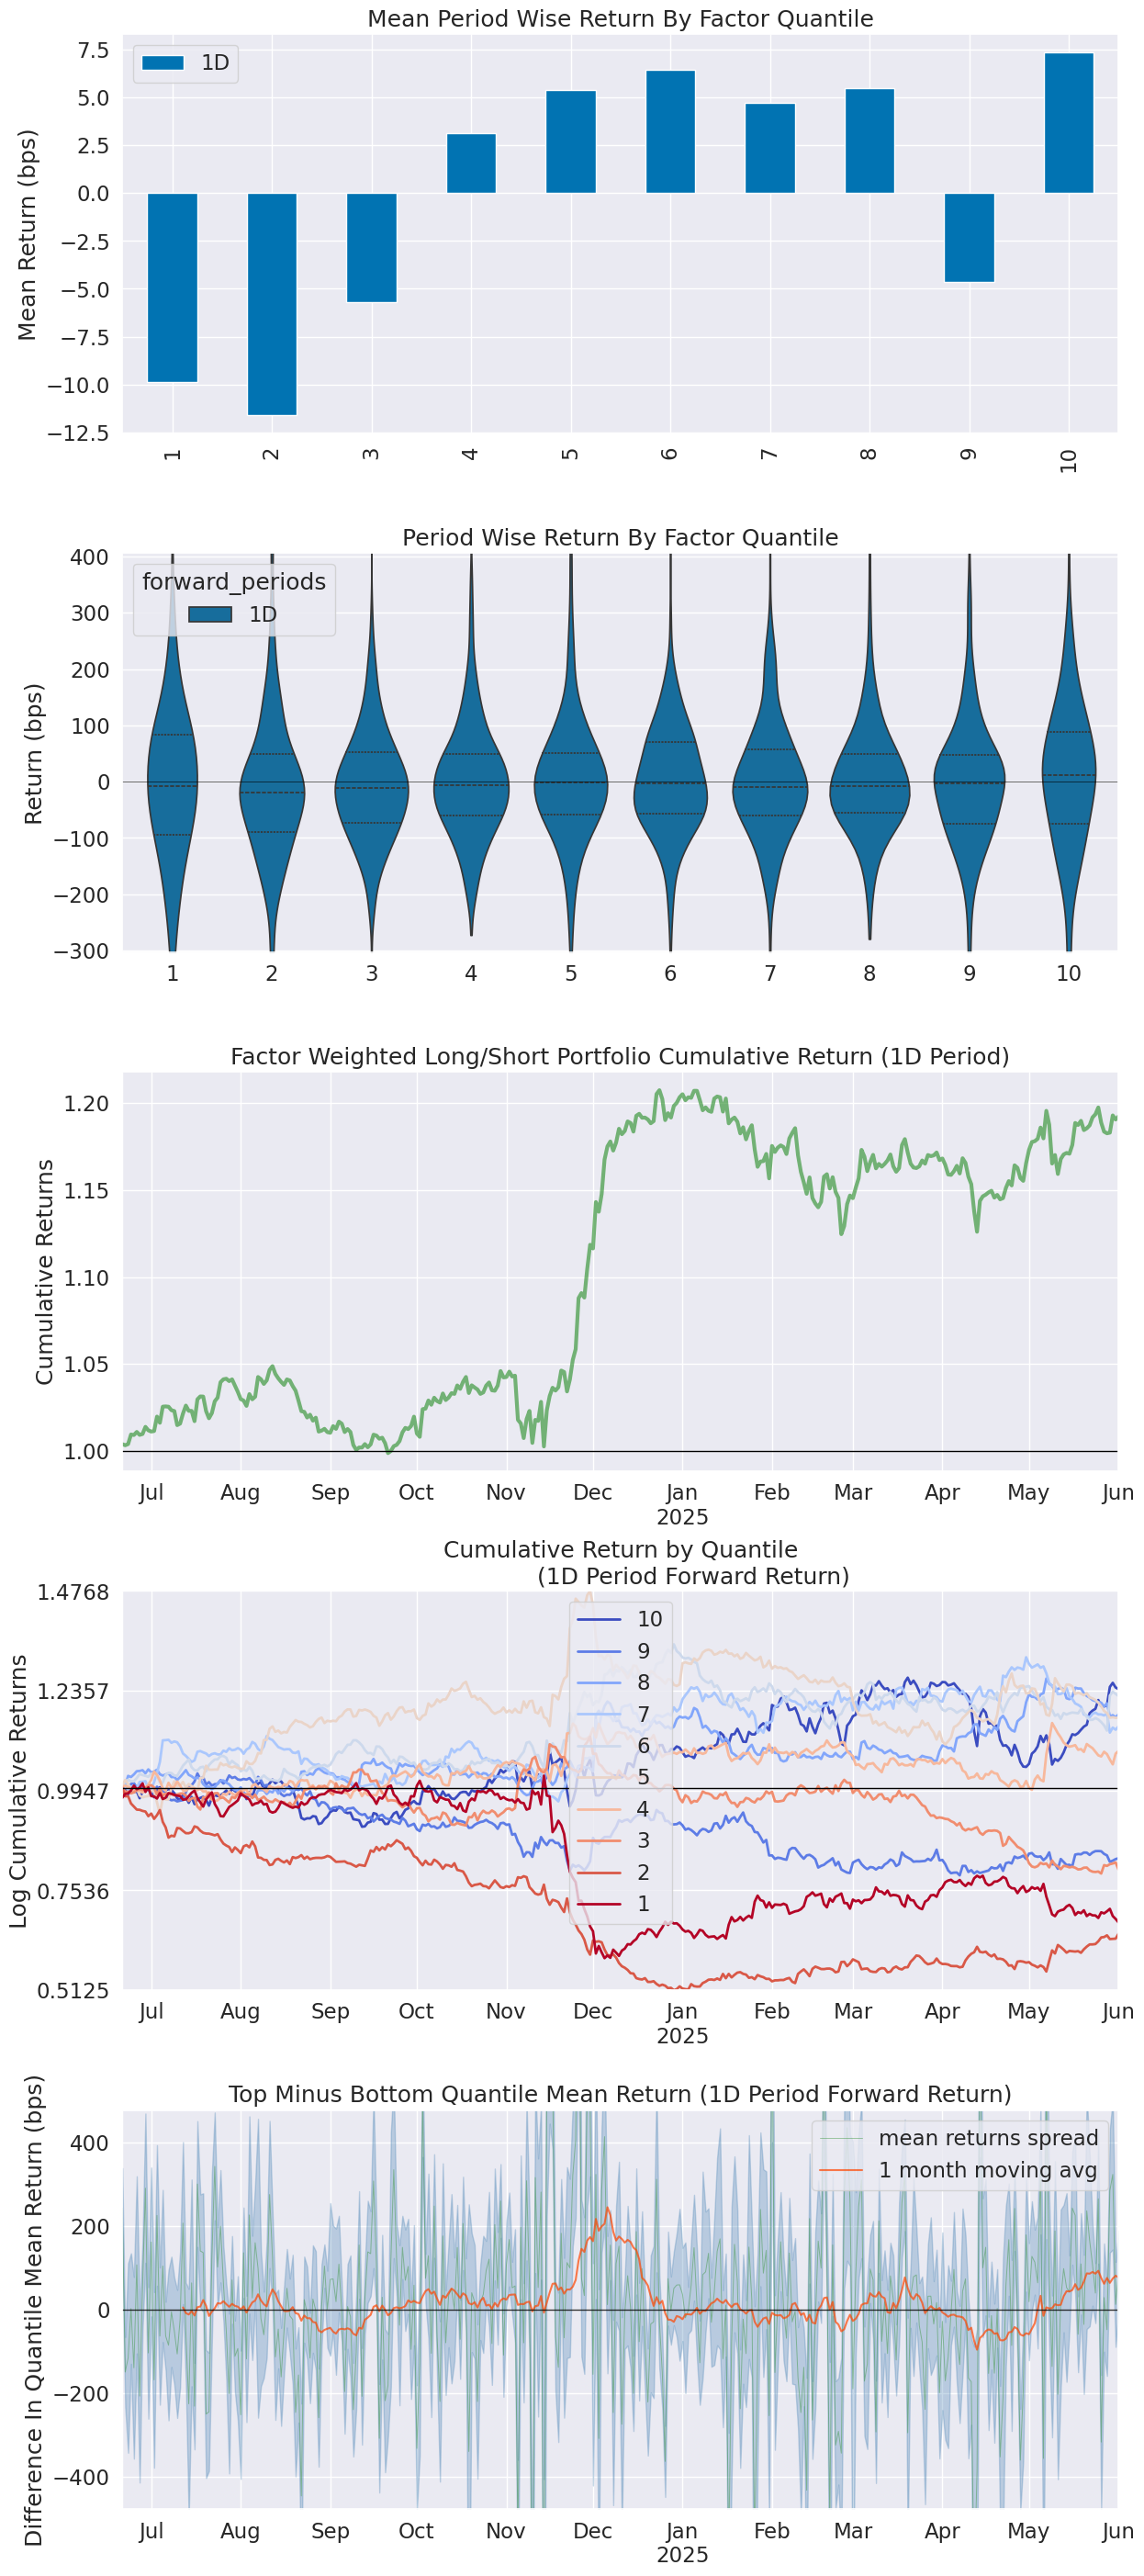

In [10]:
alpha_name = 'alpha025'
method = getattr(alpha_all_in_one, alpha_name)
single_alpha = method() 
alpha025 = single_alpha
factor = single_alpha.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值
price = close_filter


import alphalens
import alphalens.utils as utils
import alphalens.tears as tears
factor_data = utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,),  
    quantiles = 10
)
# periods means when we adjust position , 1 for 1days 
# quantiles means we split all coins into x basket

RT = tears.create_returns_tear_sheet(
    factor_data
)
RT

Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D
Ann. alpha                                     0.292
beta                                          -0.061
Mean Period Wise Return Top Quantile (bps)     6.420
Mean Period Wise Return Bottom Quantile (bps) -0.964
Mean Period Wise Spread (bps)                  7.384

<Figure size 640x480 with 0 Axes>

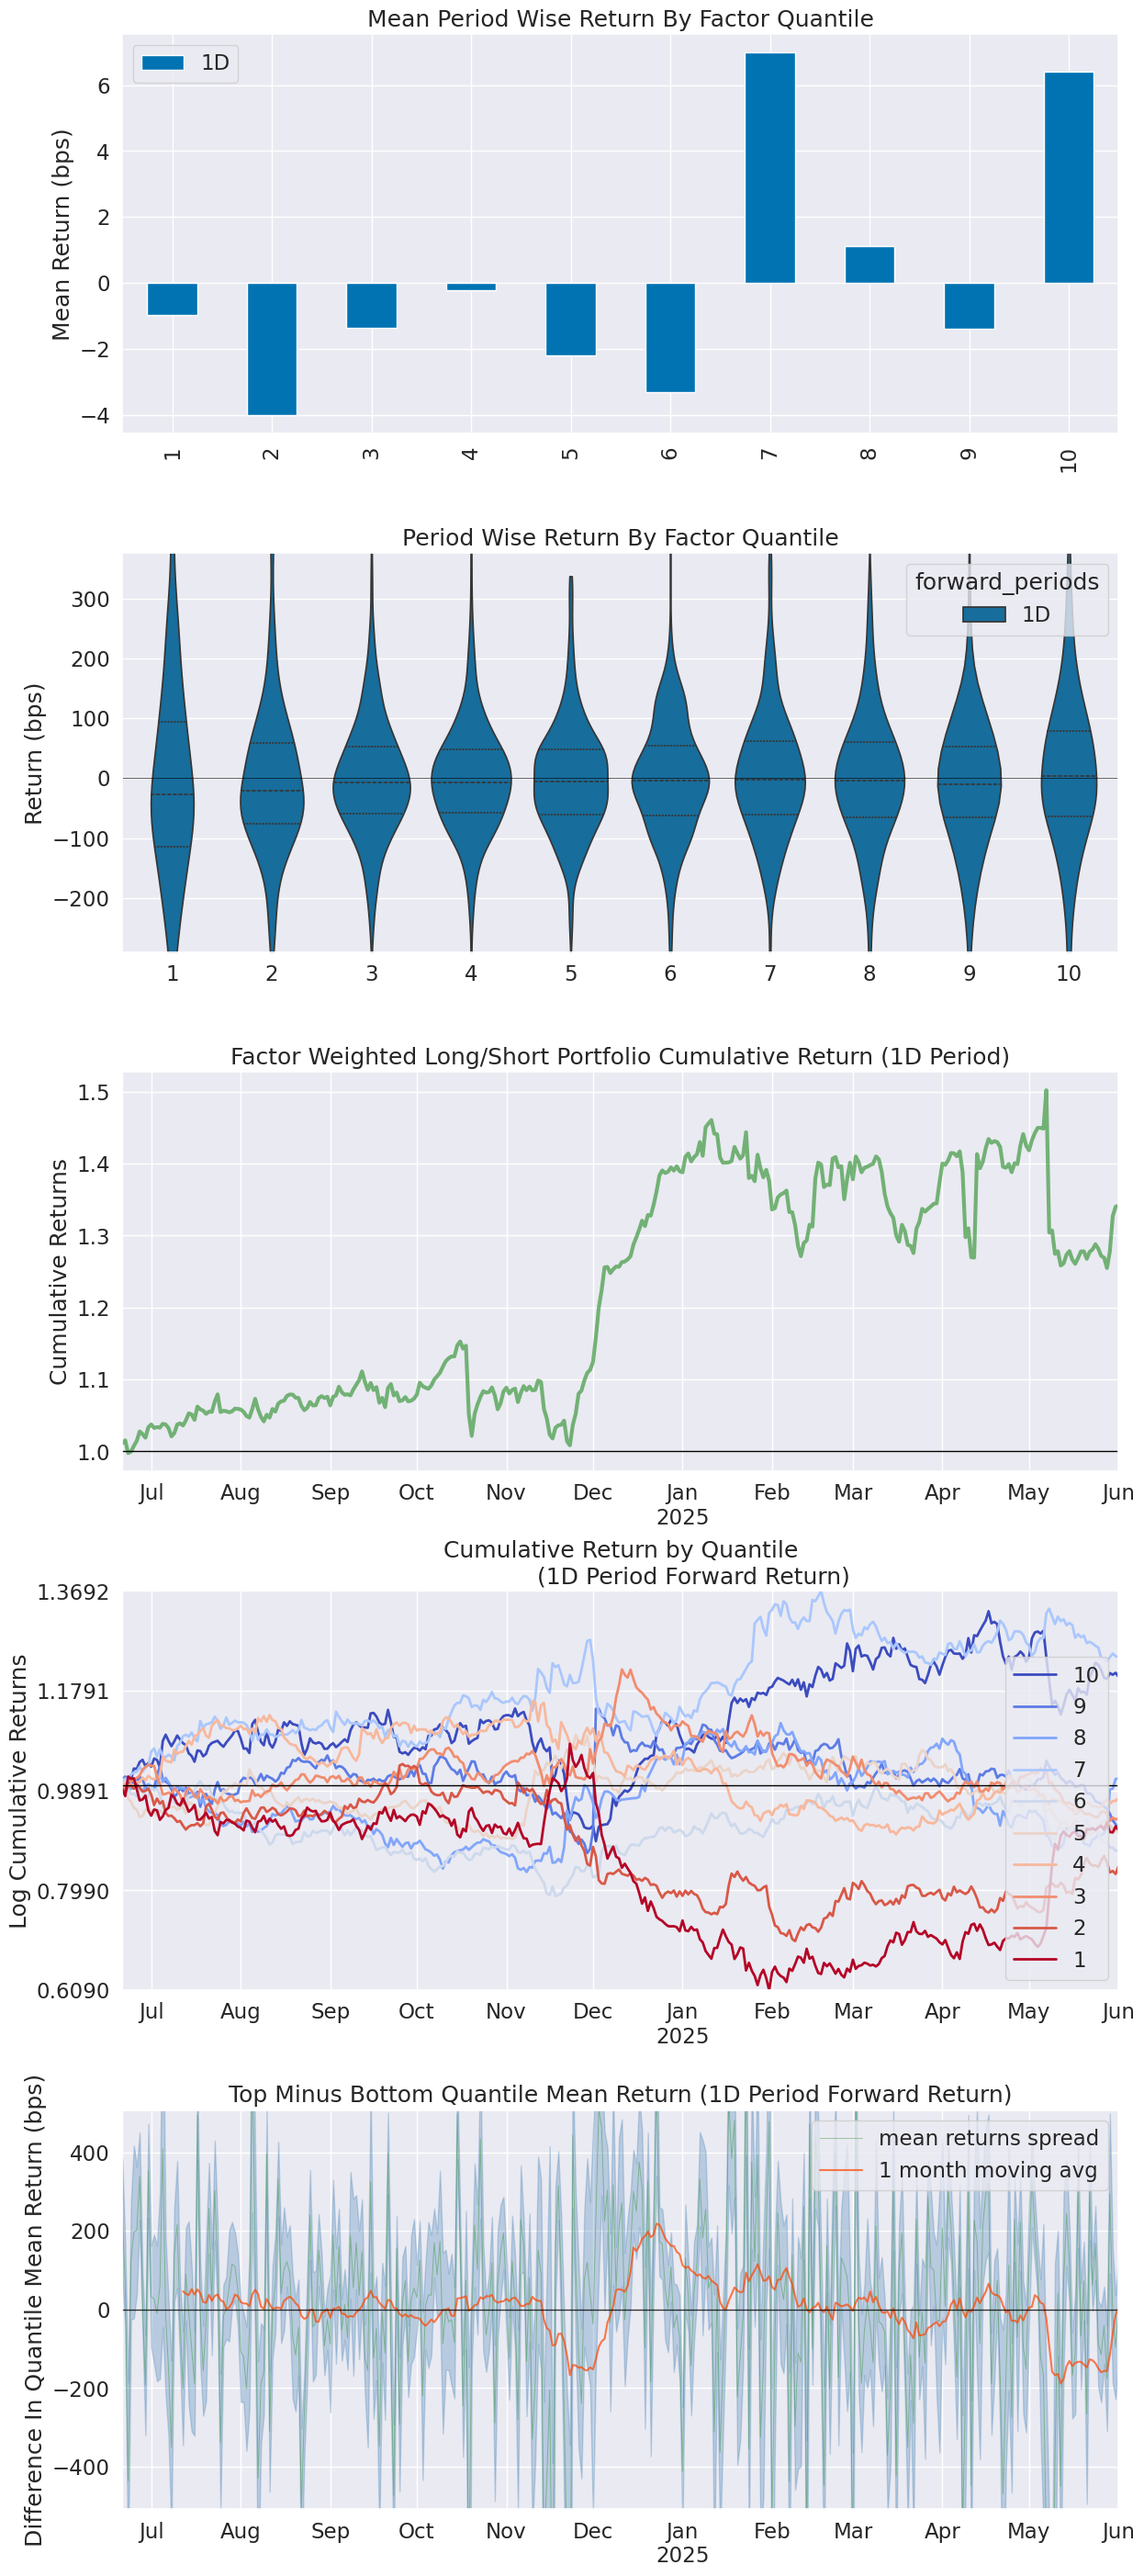

In [11]:
alpha_name = 'alpha047'
method = getattr(alpha_all_in_one, alpha_name)
single_alpha = method() 
alpha047 = -single_alpha
factor = -single_alpha.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值
price = close_filter


import alphalens
import alphalens.utils as utils
import alphalens.tears as tears
factor_data = utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,),  
    quantiles = 10
)
# periods means when we adjust position , 1 for 1days 
# quantiles means we split all coins into x basket


RT = tears.create_returns_tear_sheet(
    factor_data
)
RT

Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Returns Analysis


1D
Ann. alpha                                      0.181
beta                                           -0.007
Mean Period Wise Return Top Quantile (bps)      0.425
Mean Period Wise Return Bottom Quantile (bps) -12.634
Mean Period Wise Spread (bps)                  13.059

<Figure size 640x480 with 0 Axes>

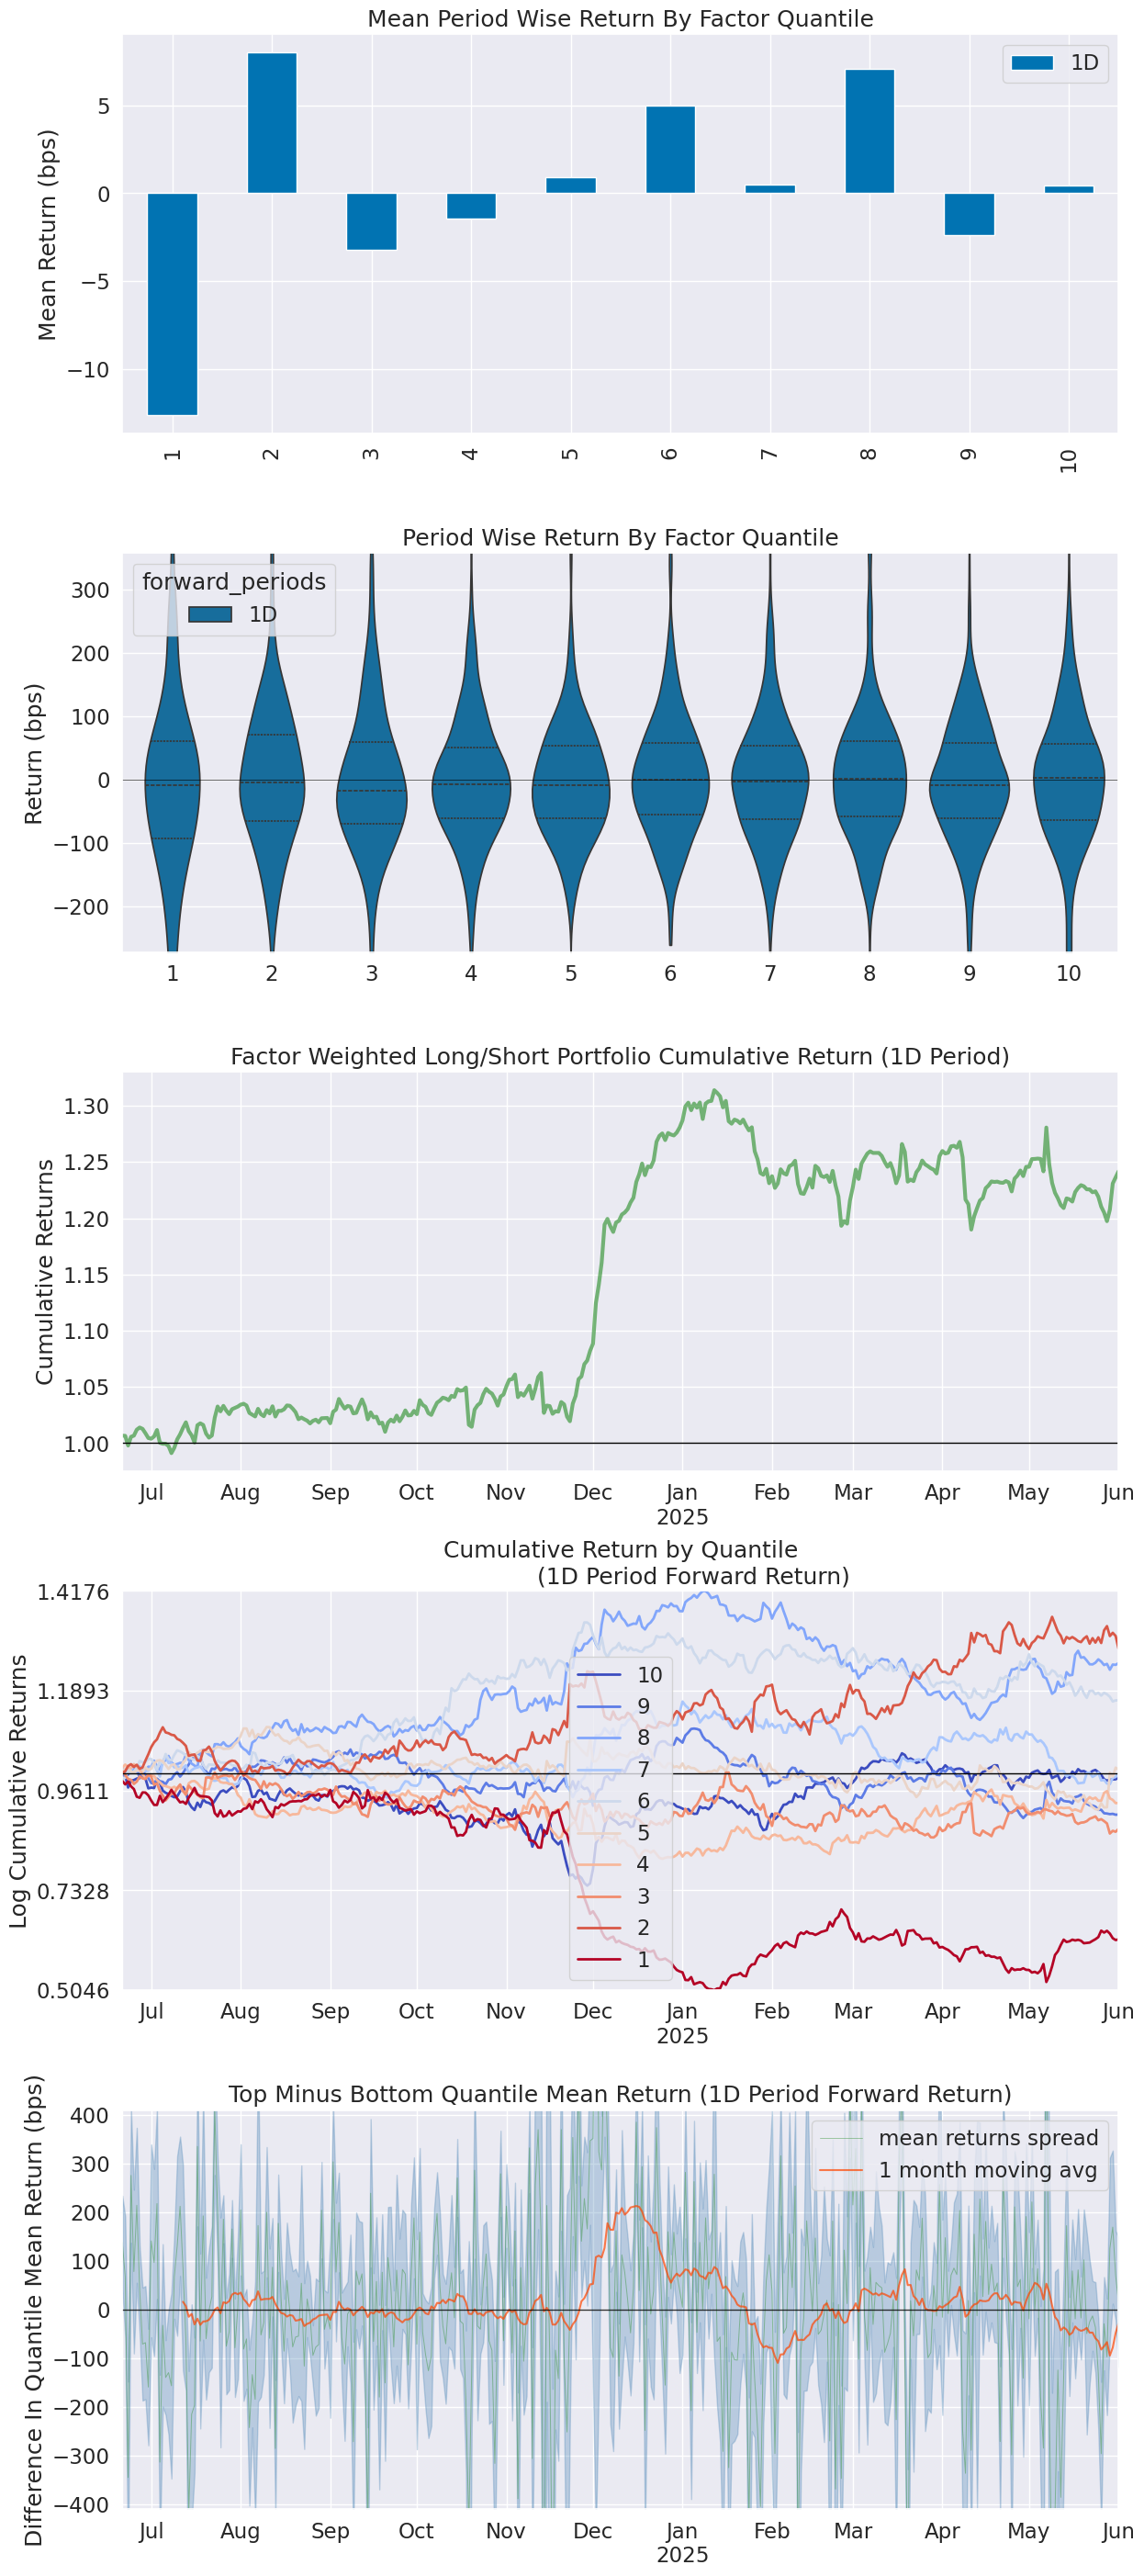

In [12]:
def normalize_df(df):
    """按行进行Z-Score归一化，处理标准差为0的情况"""
    row_means = df.mean(axis=1)
    row_stds = df.std(axis=1)
    row_stds[row_stds == 0] = 1  # 处理标准差为0的情况
    return df.sub(row_means, axis=0).div(row_stds, axis=0)


mf = normalize_df(alpha040) + normalize_df(alpha025) + normalize_df(alpha047) + normalize_df(alpha044)
nmf = normalize_df(mf)

factor = nmf.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值
price = close_filter


import alphalens
import alphalens.utils as utils
import alphalens.tears as tears
factor_data = utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,),  
    quantiles = 10
)
# periods means when we adjust position , 1 for 1days 
# quantiles means we split all coins into x basket


RT = tears.create_returns_tear_sheet(
    factor_data
)
RT